In [ ]:
from matplotlib.pyplot import figure
import copy
import matplotlib.pyplot as plt
import seaborn as sns;
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# Parameters

In [ ]:
X1 = [
      [1129],
      [1453],
      [1540]
      ]
y1 = [1.56, 1.64, 1.71]

X2 =[
     [1651],
     [1681],
     [1787]
     ]
y2 = [1.93, 2.01, 2.15]

knot=1600

X1: 
[[1129], [1453], [1540]] 

y1: 
[1.56, 1.64, 1.71] 

X2: 
[[1651], [1681], [1787]] 

y2: 
[1.93, 2.01, 2.15] 



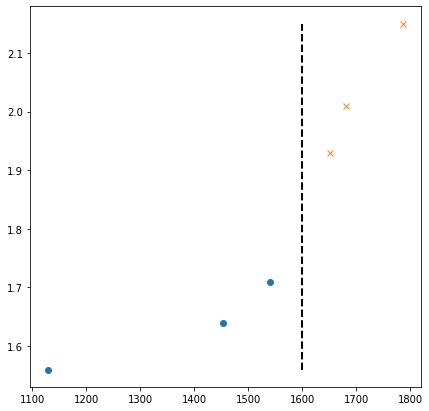

In [ ]:
print(f'X1: \n{X1} \n')
print(f'y1: \n{y1} \n')
print(f'X2: \n{X2} \n')
print(f'y2: \n{y2} \n')

plt.rcParams["figure.figsize"] = (7,7)
plt.plot(X1, y1, 'o');
plt.plot(X2, y2, 'x');
plt.vlines(x=knot, ymin=min(y2+y1), ymax=max(y2+y1), colors='black', ls='--', lw=2, label='vline_multiple');

In [ ]:
lin_reg_1 = LinearRegression(fit_intercept=True)
lin_reg_1.fit(X1, y1)
beta_0_1 = lin_reg_1.intercept_
beta1_1 = lin_reg_1.coef_
print('coef 1:')
print(np.array([beta_0_1] + list(beta1_1)))

coef 1:
[1.17945748e+00 3.32757775e-04]


In [ ]:
force_x = knot
force_y = beta_0_1 + beta1_1[0] * force_x
print(f'Forced point: x:{force_x}, y:{force_y}')
X2_transformed = copy.deepcopy(X2)
y2_transformed = copy.deepcopy(y2)
for i in range(len(y2)):
  X2_transformed[i][0] = X2_transformed[i][0] - force_x
  y2_transformed[i] = y2_transformed[i] - force_y

Forced point: x:1600, y:1.7118699238984458


In [ ]:
lin_reg_2 = LinearRegression(fit_intercept=False)
lin_reg_2.fit(X2_transformed, y2_transformed)
beta_0_2 = lin_reg_2.intercept_
beta1_2 = lin_reg_2.coef_
# at_knot_2 = beta1_2[0] * knot
# beta_0_2 = at_knot_1 - at_knot_2
print('coef 2:')
print(np.array([beta_0_2] + list(beta1_2)))

coef 2:
[0.         0.00265581]


beta zero (first): 
1.1794574833194775 

beta zero (second): 
0.0 



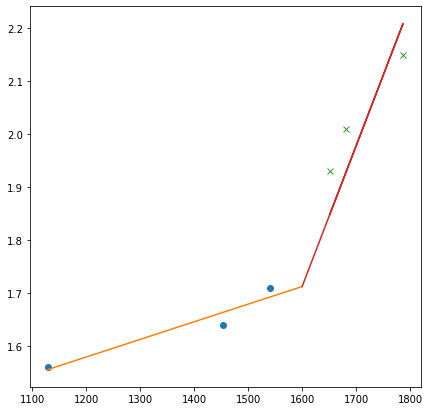

In [ ]:
plt.rcParams["figure.figsize"] = (7,7)
plt.plot(X1, y1, 'o');
plt.plot(X1 + [[force_x]], beta_0_1 + beta1_1*(X1 + [[force_x]]))

plt.plot(X2, y2, 'x');
plt.plot(X2 + [[force_x]], beta_0_2 + beta1_2*(X2_transformed + [[0]]) + force_y);

print(f'beta zero (first): \n{beta_0_1} \n')
print(f'beta zero (second): \n{beta_0_2} \n')